In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [489]:
n, d, k = 100, 3, 2

In [490]:
np.random.seed(20)
X = rand(n, d)

means = np.array([rand(d)  for _ in range(k)])  # works for any k
#means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = np.array([S]*k) # we'll use the same Sigma for all clusters for better visual results

#rows, cols = np.indices((X.shape[0], q.shape[0]))
print(means)
print(np.linalg.inv(sigmas))

[[0.75290762 0.96224455 0.82506169]
 [0.2202413  0.23810885 0.31070211]]
[[[1.01987846 0.         0.        ]
  [0.         1.56538481 0.        ]
  [0.         0.         1.10507203]]

 [[1.01987846 0.         0.        ]
  [0.         1.56538481 0.        ]
  [0.         0.         1.10507203]]]


Solution
===

In [495]:
def compute_log_p(X, mean, sigma):
    ''' 
        compute_log_p
        Returns the probabilities that elements in X are in the set given by the mean and sigma provided
        
        INPUTS
        X: An n by d array of data points
        mean: A 1 by d array of the mean of the set given
        sigma: A d by d covariance matrix of the set given
        
        OUTPUTS
        An n by 1 array representing the probabilities that the elements of X are in the set
    '''
    x_diff = (X-mean)
    num = np.sum(-0.5*(x_diff)*(np.linalg.inv(sigma).dot((x_diff).T)).T,axis=1)
    denom = np.log((2*np.pi)**(X.shape[1]/2)*np.linalg.det(sigma)**(1/2))
    return (num - denom)

In [491]:
def compute_log_ps(X, means, sigmas):
    ''' 
        compute_log_p
        Returns the probabilities that elements in X are in the set given by the mean and sigma provided
        
        INPUTS
        X: An n by d array of data points
        means: A k by d array of the mean of the sets given
        sigmas: A d by d by k covariance matrix of the sets given
        
        OUTPUTS
        An n by 1 array representing the probabilities that the elements of X are in the set
    '''
    d = X.shape[1]
    n = X.shape[0]
    k = means.shape[0]
    
    rows, cols = np.indices((k,n))
    diff = (X[cols.ravel()] - means[rows.ravel()])
    sigma_inv = np.linalg.inv(sigmas[rows.ravel()])
    c = np.einsum('ij,ijk->ik',diff,sigma_inv)
    num = np.sum(c*diff,axis=1).reshape(n,k)
    
    denom = np.log((2*np.pi)**(d/2)*np.linalg.det(sigmas)**(1/2))
    return (num - denom).reshape(k,n)

In [492]:
log_ps = compute_log_ps(X,means,sigmas)
log_ps.shape

(2, 100)

In [496]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

AttributeError: 'list' object has no attribute 'shape'

In [497]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0]


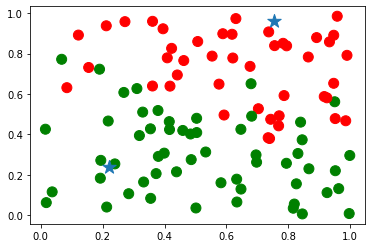

In [498]:
if k == 2:
    colors = np.array(['red', 'green'])[assignments]
elif k ==3:
    colors = np.array(['red', 'green', 'blue'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()